# **Exploratory Data Analysis (Original Dataset)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading Data and Exploration 

In [2]:
# Load the dataset
df = pd.read_csv("amazon_reviews_us_Electronics_v1_00.tsv", sep="\t",  on_bad_lines="skip")

In [3]:
print(df.shape)
df.head()

(3091024, 15)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [4]:
df.info

<bound method DataFrame.info of         marketplace  customer_id       review_id  product_id  product_parent  \
0                US     41409413  R2MTG1GCZLR2DK  B00428R89M       112201306   
1                US     49668221  R2HBOEM8LE9928  B000068O48       734576678   
2                US     12338275  R1P4RW1R9FDPEE  B000GGKOG8       614448099   
3                US     38487968  R1EBPM82ENI67M  B000NU4OTA        72265257   
4                US     23732619  R372S58V6D11AT  B00JOQIO6S       308169188   
...             ...          ...             ...         ...             ...   
3091019          US     51216847   RZ3LLAKIZQ3RR  B00000JBAT       738692522   
3091020          US     52953714  R1V8GVI67B7V0K  B00000JBAT       738692522   
3091021          US     51764094  R3BDESK5VUNK8C  B00000J4FY       503765214   
3091022          US     52011360  R1JJGM0JWVT7DV  B00000JHWN       662358399   
3091023          US     51807224  R30PZG0PCGR2V0  0966185056       435880663   

       

In [5]:
print(df.dtypes)

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object


### Checking for missing values 

In [7]:
print(df.isnull().any())


marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title         True
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline       True
review_body           True
review_date           True
dtype: bool


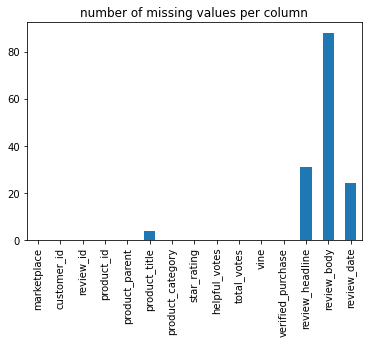

In [8]:
# bar plot showing number of missing values per column
df.isna().sum().plot(kind='bar', title='number of missing values per column')

plt.show()

In [9]:
# first and last review date
df['review_date'] = pd.to_datetime(df['review_date'])
df["review_date"].agg(["min", "max"])

min   1999-06-09
max   2015-08-31
Name: review_date, dtype: datetime64[ns]

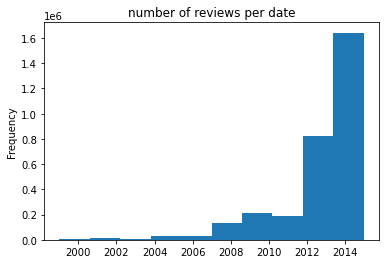

In [10]:
# histogram of number of reviews per date
fig, ax = plt.subplots()
df["review_date"].dt.year.plot(kind="hist", title="number of reviews per date", ax=ax)

plt.show()

In [11]:
# number of reviews per customer
df["customer_id"].value_counts().describe()

count    2.152773e+06
mean     1.435834e+00
std      1.470075e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.340000e+02
Name: customer_id, dtype: float64

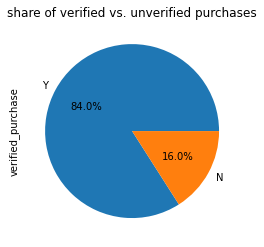

In [12]:
# number of verified vs. unverified purchases
df["verified_purchase"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="share of verified vs. unverified purchases")

plt.show()

### Distribution of Rating 

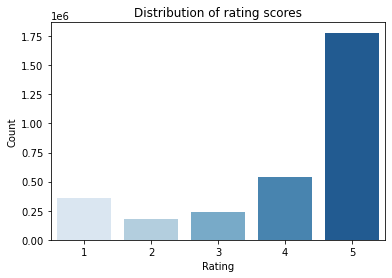

In [13]:
# distribution of rating
sns.countplot(x=df['star_rating'], palette="Blues")

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

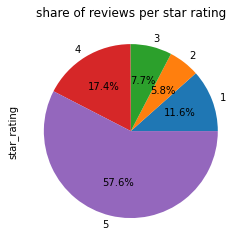

In [14]:
# pie chart for number of reviews per star rating
df["star_rating"].value_counts().sort_index().plot(kind="pie", autopct='%1.1f%%', title="share of reviews per star rating")

plt.show()

### Function for mapping sentiment

In [15]:
#Since the distribution of rating is highly imbalanced, we can convert the score into 3 categories: negative(<3), neutral(=3), positive(>3)

def map_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'
    
df['sentiment'] = df['star_rating'].apply(map_sentiment)


### Distribution of Sentiments 

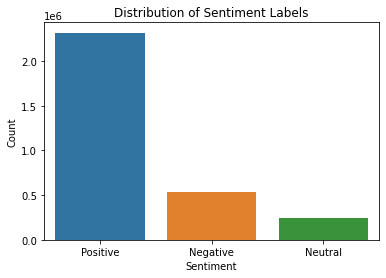

In [17]:
# Plot the score distribution after conversion
sns.countplot(x=df['sentiment'])

plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [18]:
# Calculate sentiment distribution
sentiment_distribution = df['sentiment'].value_counts(normalize = True)
print(sentiment_distribution)

Positive    0.749198
Negative    0.173680
Neutral     0.077122
Name: sentiment, dtype: float64


# **Basic Preprocessing of Dataset & Downsampling**

Since the original dataset is very large, we need to do some preprocessing and downsample it.

- filter dataset by review_date (with the most recent reviews), as the data set is very large
- remove the rows with empty/missing text review field
- only use relevant columns, including the review body and the star ratings

In [19]:
filtered_data = df.copy()

# filter by last month reviews based on review_date
filtered_data['review_date'] = pd.to_datetime(filtered_data ['review_date'])
filtered_data  = filtered_data [filtered_data ['review_date'] >= datetime(2015, 8, 15)] 

In [20]:
filtered_data .shape

(56743, 16)

In [21]:
print(filtered_data.isnull().any())

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title        False
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline      False
review_body           True
review_date          False
sentiment            False
dtype: bool


In [22]:
# Drop rows with missing review text
filtered_data = filtered_data.dropna(subset=['review_body'])

In [23]:
filtered_data .shape

(56738, 16)

In [24]:
# Calculate sentiment distribution
sentiment_distribution = filtered_data['sentiment'].value_counts(normalize = True)
print(sentiment_distribution)

Positive    0.763509
Negative    0.168000
Neutral     0.068490
Name: sentiment, dtype: float64


In [25]:
# Determine target sample size for each class
downsampled_size = 10000
target_sample_sizes = (sentiment_distribution * downsampled_size).astype(int)

# Downsampling each class to target sample size
downsampled_data = pd.concat([filtered_data[filtered_data['sentiment'] == sentiment].sample(n=target_sample_sizes[sentiment], replace=False)
                     for sentiment in target_sample_sizes.index])

# Shuffle the downsampled_dataset
downsampled_data = downsampled_data.sample(frac = 1).reset_index(drop = True)


In [26]:
downsampled_data.shape

(9999, 16)

In [27]:
print(downsampled_data.isnull().any())

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title        False
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline      False
review_body          False
review_date          False
sentiment            False
dtype: bool


In [28]:
# Calculate sentiment distribution
sentiment_distribution = downsampled_data['sentiment'].value_counts(normalize = True)
print(sentiment_distribution)

Positive    0.763576
Negative    0.168017
Neutral     0.068407
Name: sentiment, dtype: float64


### Sentiment Distribution after Downsampling 

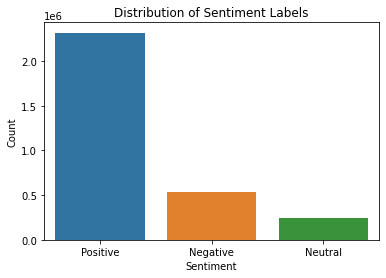

In [29]:
# Plot the sentiment distribution after downsampling
sns.countplot(x=df['sentiment'])

plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [30]:
# Save the downsampled dataset to a new file
#downsampled_data.to_csv('downsampled_dataset_10k.csv', index=False)

In [31]:
# Actually we only need the content(i.e. review) & the sentiment score for classification
downsampled_data = downsampled_data[["review_body", "sentiment"]]
downsampled_data.head(10)

,review_body,sentiment
0,Very happy with this. Works perfect.,Positive
1,"Had this for about 5 months now. Great sound, ...",Positive
2,Especially for the price!,Positive
3,Construction seemed OK. Controls and connecti...,Neutral
4,It does build as strong at all as expected.,Neutral
5,This 2 pack of Male to Male stereo speaker cab...,Positive
6,"Mixes the looks for an antique, but with the m...",Positive
7,"Works Great, sound and video quality is terrif...",Positive
8,Excellent,Positive
9,"This item was extremely NOT user friendly, it ...",Negative
